<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/OneHot_Encoding_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. One-Hot Encoding,
### 어떻게 진행되는지 절차 보기.
### 단어 집합 => 서로 다른 단어들의 집합. 변형도 포함(ex book, books도 서로 다른 것으로 간주)


### 단어 집합의 단어 => 숫자, 구체적으로는 vector로 바꾸는 작업이 반드시 필요함.
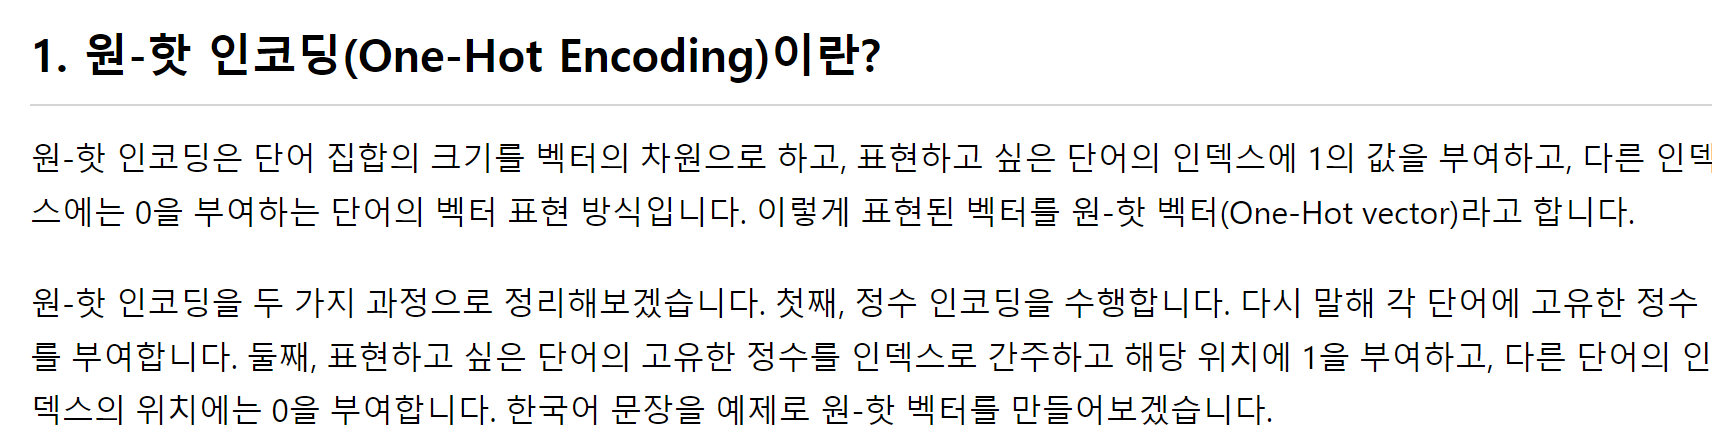

In [2]:
!pip install konlpy

from konlpy.tag import Okt

okt = Okt()
tokens = okt.morphs('나는 자연어 처리를 배운다')
print(tokens)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.1 MB/s eta 0:00:00
['나', '는', '자연어', '처리', '를', '배운다']


In [3]:
# 토큰에 대해 정수 부여하기.

word_to_index = {word:index for index, word in enumerate(tokens)}
print('단어 집합 :', word_to_index)

단어 집합 : {'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


아래의 함수는 word와 word_to_index 두 개의 매개변수를 입력으로 받습니다.
word는 원핫 인코딩을 적용할 대상 단어이며, word_to_index는 단어를 인덱스로 매핑한 사전입니다.

one_hot_vector는 길이가 word_to_index의 단어 개수와 같은 리스트로 초기화됩니다

이 리스트는 원핫 벡터로 사용될 것입니다.

index 변수에는 주어진 word에 해당하는 인덱스를 word_to_index에서 가져옵니다.
one_hot_vector 리스트에서 index 위치를 1로 설정하여 해당 단어의 원핫 인코딩을 표현합니다.
원핫 벡터인 one_hot_vector를 반환합니다.

In [4]:
def one_hot_encoding(word, word_to_index):
  one_hot_vector = [0] * (len(word_to_index))
  index = word_to_index[word]
  one_hot_vector[index] = 1
  return one_hot_vector

one_hot_encoding('자연어', word_to_index)

[0, 0, 1, 0, 0, 0]

# 2. Keras를 이용한 원핫인코딩
## to_categorical() 사용.

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = '나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야'

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

print('단어 집합:', tokenizer.word_index)

단어 집합: {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [10]:
#단어 집합 내의 일부 단어로 구성된 서브 텍스트 생성

sub_text = '점심 먹으러 갈래 메뉴는 햄버거 최고야'
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [12]:
one_hot = to_categorical(encoded)
print(one_hot)

# 각각 인덱스의 원핫벡터가 출력됨.

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


# One-Hot Encoding의 한계

이러한 표현 방식은 단어의 개수가 늘어날 수록, 벡터를 저장하기 위해 필요한 공간이 계속 늘어난다는 단점이 있습니다. 다른 표현으로는 벡터의 차원이 늘어난다고 표현합니다. 원 핫 벡터는 단어 집합의 크기가 곧 벡터의 차원 수가 됩니다. 가령, 단어가 1,000개인 코퍼스를 가지고 원 핫 벡터를 만들면, 모든 단어 각각은 모두 1,000개의 차원을 가진 벡터가 됩니다. 다시 말해 모든 단어 각각은 하나의 값만 1을 가지고, 999개의 값은 0의 값을 가지는 벡터가 되는데 이는 저장 공간 측면에서는 매우 비효율적인 표현 방법입니다.

또한 원-핫 벡터는 단어의 유사도를 표현하지 못한다는 단점이 있습니다. 예를 들어서 늑대, 호랑이, 강아지, 고양이라는 4개의 단어에 대해서 원-핫 인코딩을 해서 각각, [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]이라는 원-핫 벡터를 부여받았다고 합시다. 이때 원-핫 벡터로는 강아지와 늑대가 유사하고, 호랑이와 고양이가 유사하다는 것을 표현할 수가 없습니다. 좀 더 극단적으로는 강아지, 개, 냉장고라는 단어가 있을 때 강아지라는 단어가 개와 냉장고라는 단어 중 어떤 단어와 더 유사한지도 알 수 없습니다.

단어 간 유사성을 알 수 없다는 단점은 검색 시스템 등에서는 문제가 될 소지가 있습니다. 가령, 여행을 가려고 웹 검색창에 '삿포로 숙소'라는 단어를 검색한다고 합시다. 제대로 된 검색 시스템이라면, '삿포로 숙소'라는 검색어에 대해서 '삿포로 게스트 하우스', '삿포로 료칸', '삿포로 호텔'과 같은 유사 단어에 대한 결과도 함께 보여줄 수 있어야 합니다. 하지만 단어간 유사성을 계산할 수 없다면, '게스트 하우스'와 '료칸'과 '호텔'이라는 연관 검색어를 보여줄 수 없습니다.

이러한 단점을 해결하기 위해 단어의 잠재 의미를 반영하여 다차원 공간에 벡터화 하는 기법으로 크게 두 가지가 있습니다. 첫째는 카운트 기반의 벡터화 방법인 LSA(잠재 의미 분석), HAL 등이 있으며, 둘째는 예측 기반으로 벡터화하는 NNLM, RNNLM, Word2Vec, FastText 등이 있습니다. 그리고 카운트 기반과 예측 기반 두 가지 방법을 모두 사용하는 방법으로 GloVe라는 방법이 존재합니다.